# **Deep Learning Assignment  -  cs23mtech14018 ( Yash Shukla )**



Note: It is advisable to avoid using "run all" function from Rutime and instead execute the code cell by cell to prevent potential issues such as overlapping variables and other factors.

# **1. Perceptron learning algorithm**
[10 = dataset creation 2 + perceptron learning algorithm 5 + analysis 3]
Implement perceptron learning algorithm for classifying a linearly separable dataset in 2D. Note
that you have to create such a dataset with at least 1000 data points. Plot the dataset before and
after training (with the classifier).
Discuss your observations with respect to number of iterations required for perfect classification (k)
by varying the level of separability (γ from the class discussions) in the dataset. (Hint: compute
the average value of k for each level of γ, and do this for about 5 values of γ. Observe if you can
relate to the result discussed in class)

In [119]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# **DataSet Creation**

Shape of Y: (1000,)


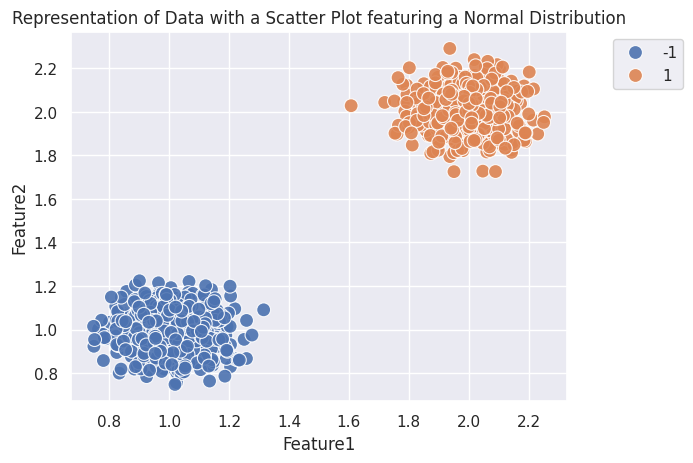

In [120]:
# Defining the parameters for the first cluster
mean_first_cluster_feature1   = 1
mean_first_cluster_feature2  = 1
std_deviation_first_cluster_feature1  = 0.1
std_deviation_first_cluster_feature2  = 0.1
datapoints_first_cluster = 500
no_of_features_first_cluster  = 2

# Generating the first cluster with normal distribution
cluster1 = np.random.normal([mean_first_cluster_feature1 , mean_first_cluster_feature2 ], [ std_deviation_first_cluster_feature1 ,  std_deviation_first_cluster_feature2 ], size=( datapoints_first_cluster, no_of_features_first_cluster ))

# Defining the parameters for the second cluster
mean_second_cluster_feature1 = 2
mean_second_cluster_feature2  = 2
std_deviation_second_cluster_feature1  = 0.1
std_deviation_second_cluster_feature2  = 0.1
datapoints_second_cluster  = 500
no_of_features_second_cluster  = 2

# Generating the second cluster with normal distribution
cluster2 = np.random.normal([mean_second_cluster_feature1, mean_second_cluster_feature2 ], [std_deviation_second_cluster_feature1 , std_deviation_second_cluster_feature2 ], size=(datapoints_second_cluster , no_of_features_second_cluster ))

# Combine both clusters into feature matrix X
X = np.vstack([cluster1, cluster2])

# Create labels Y: -1 for the first cluster, 1 for the second cluster
Y = np.array([-1 for _ in range( datapoints_first_cluster)] + [1 for _ in range(datapoints_second_cluster )])

# Generate a DataFrame to facilitate visualization
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Label'] = Y

# Seaborn is a library for making statistical graphics in Python.
# Set Seaborn style
sns.set_theme(style='darkgrid', palette='deep')

# Create a scatter plot with color gradient
plt.figure()
scatter_plot = sns.scatterplot(x='Feature1', y='Feature2', hue='Label', data=df, palette='deep', s=100, alpha=0.9)

# Set plot title and labels
plt.title('Representation of Data with a Scatter Plot featuring a Normal Distribution')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# Show the plot
plt.show()


In [121]:
# function to find Distance between the points by Euclidean Distance
def find_dist(d1, d2):
    """
    Calculate the Euclidean distance between two points.
    Parameters:
    - d1 (list): Coordinates of the first point.
    - d2 (list): Coordinates of the second point.
    Returns:
    - float: Euclidean distance between the two points.
    """
    return ((d1[0] - d2[0]) ** 2 + (d1[1] - d2[1]) ** 2) ** 0.5

# Function to find the Nearest points from two clusters
def find_nearest_points(cluster1, cluster2):
    """
    Find the nearest points between two clusters.

    Parameters:
    - cluster1 (numpy.ndarray): Coordinates of points in the first cluster.
    - cluster2 (numpy.ndarray): Coordinates of points in the second cluster.

    Returns:
    - tuple: Coordinates of the nearest points (c1, c2).
    """
    min_dist = float('inf')
    c1, c2 = None, None

    # Iterate through each pair of points in both clusters..!!!
    for d1 in cluster1:
        for d2 in cluster2:
            new_dist = find_dist(d1, d2)

            # Update nearest points if the new distance is smaller
            if new_dist <= min_dist:
                min_dist = new_dist
                c1 = d1
                c2 = d2

    return c1, c2

# Find the nearest points between two clusters
c1, c2 = find_nearest_points(cluster1, cluster2)

# Print the coordinates of the nearest points and their distance
print("coordinates of this Nearest points:", c1, c2)
print("Distances between the nearest points is :", find_dist(c1, c2))


coordinates of this Nearest points: [1.20355315 1.19920944] [1.81170166 1.84764022]
Distances between the nearest points is : 0.8889921731367008


# **Implementing Perceptron Training Algorithm**

In [122]:
def perceptron(X, Y, W, Epochs):
    """
    Implement the Perceptron learning algorithm.

    Parameters:
    - X (numpy.ndarray): Input features.
    - Y (numpy.ndarray): Labels.
    - W (numpy.ndarray): Weight vector.
    - Epochs (int): Number of training epochs.

    Returns:
    - tuple: Total mistakes made during training, final weight vector.
    """
    list_of_mistakes = []  #Its an list of mistakes to track the number of mistakes made in each epoch
    n = 1

    # Iterate through epochs
    for itr in range(Epochs):
        mistakes = 0

        # Iterate through each training example at a time
        for i in range(X.shape[0]):
            Y_pred = X[i].dot(W)

            # Update weights if a mistake is made through
            if Y_pred * Y[i] <= 0:
                W = W + (X[i] * Y[i])
                mistakes += 1

        list_of_mistakes.append(mistakes)

        # Check for convergence (no mistakes in the epoch)
        if list_of_mistakes[-1] == 0:
            print("The algorithm runs for a specified number of epochs", len(list_of_mistakes) - 1)
            n = len(list_of_mistakes)
            break

    return sum(list_of_mistakes), W


# Example usage
# Replace X, Y, W, and Epochs with your actual values
# total_mistakes, final_weights = perceptron(X, Y, W, Epochs)


In [123]:
import seaborn as sns
import numpy as np

def create_plot(ax, df, Y, W):
    """
    Create a scatter plot with the decision boundary.

    Parameters:
    - ax (matplotlib.axes._subplots.AxesSubplot): Matplotlib axis for plotting.
    - df (pd.DataFrame): DataFrame containing the data.
    - Y (numpy.ndarray): Labels.
    - W (tuple): Tuple containing the bias and weight coefficients (b, w1, w2).

    Returns:
    - None
    """
    b, w1, w2 = W

    # Set Seaborn style
    sns.set_theme(style='darkgrid', palette='deep')

    # Create a scatter plot with color gradient
    scatter_plot = sns.scatterplot(x='Feature1', y='Feature2', hue='Label', data=df, palette='deep', s=100, alpha=0.9, ax=ax)

    # Set plot title and labels
    ax.set_title('Representation Scatter Plot featuring a Normal Distribution')
    ax.set_xlabel('Feature1')
    ax.set_ylabel('Feature2')
    ax.legend()

    # Plot the decision boundary
    x_min, x_max = df['Feature1'].min() + 0.3, df['Feature1'].max() - 0.3
    xx = np.linspace(x_min, x_max, 100)

    # Avoid division by zero
    if w2 == 0:
        w2 = 0.00001

    yy = - (w1 / w2) * xx - (b / w2)

    ax.plot(xx, yy, color='red', linestyle='dashed', linewidth=2, label='Respective Decision Boundary')
    ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# Example usage:
# Replace ax, df, Y, and W with your actual values
# create_plot(ax, df, Y, W)


In [124]:
X = np.column_stack([np.ones(X.shape[0]), X])

# **Analysis of the Algorithm**

[0.8889921731367008, 0.8889921731367008] This are the gamma values
The algorithm runs for a specified number of epochs 4
Mistakes made during training: 8


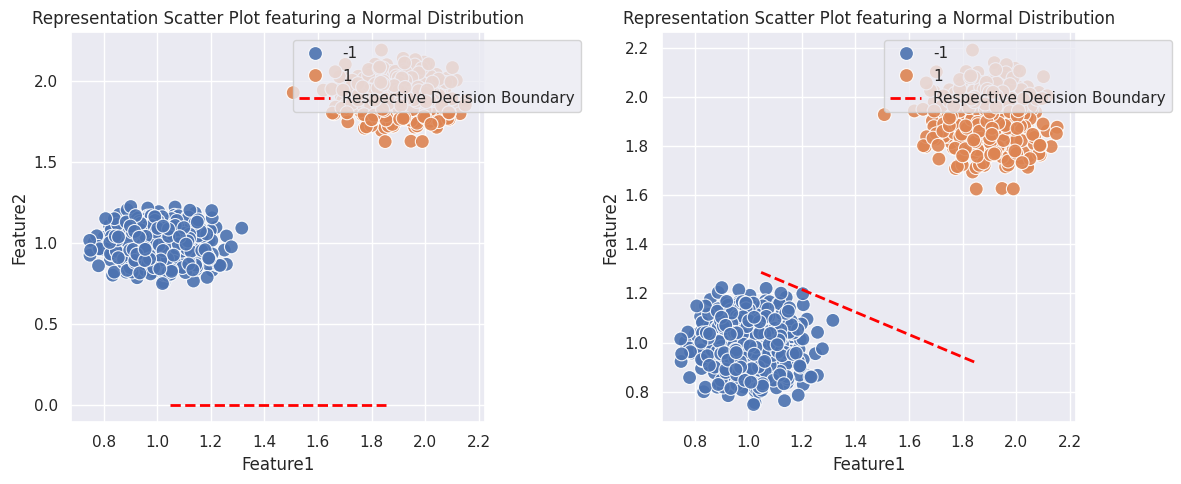

[0.8889921731367008, 0.8889921731367008, 0.7476571582814227] This are the gamma values
The algorithm runs for a specified number of epochs 6
Mistakes made during training: 13


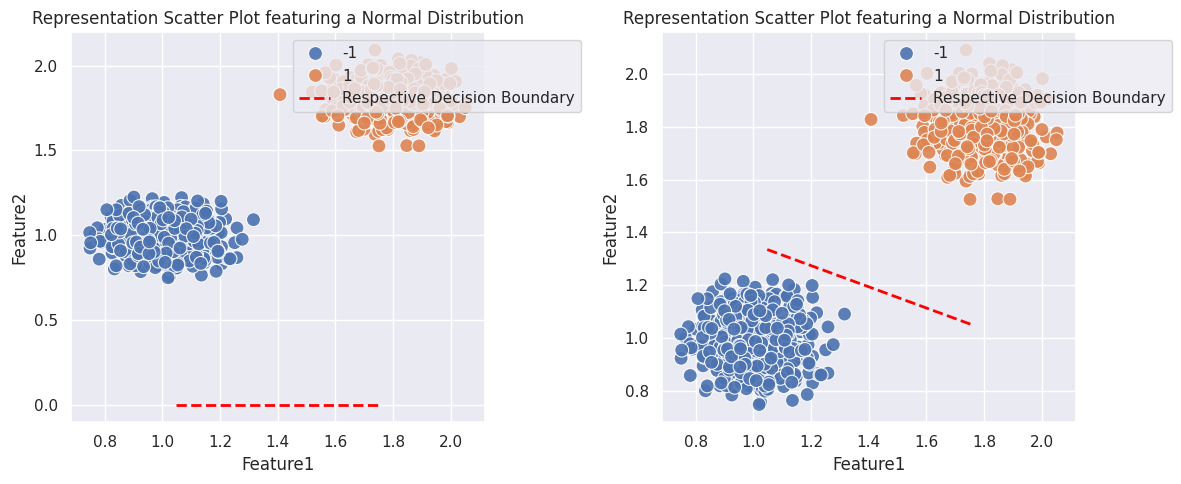

[0.8889921731367008, 0.8889921731367008, 0.7476571582814227, 0.6063624071135936] This are the gamma values
The algorithm runs for a specified number of epochs 9
Mistakes made during training: 20


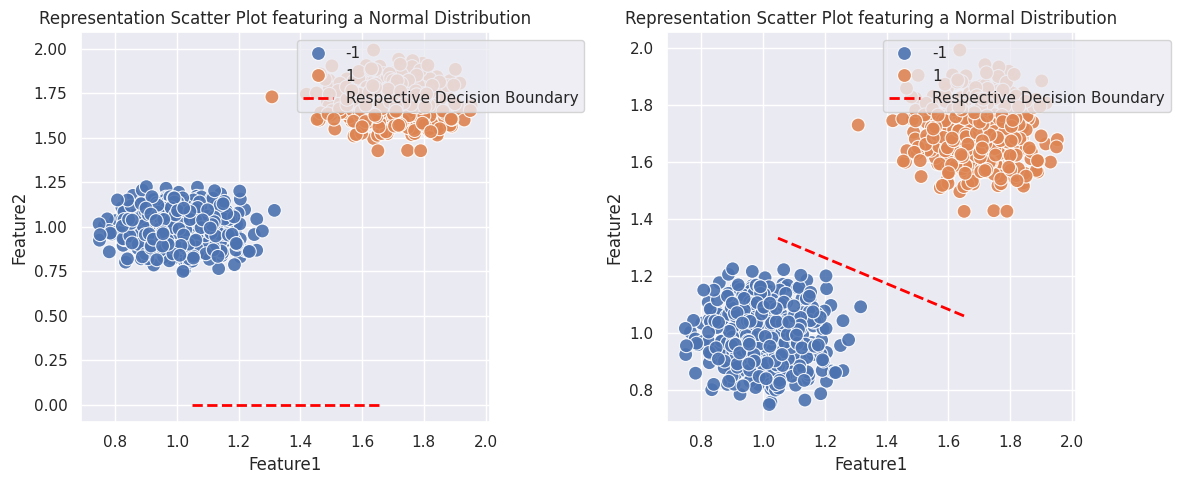

[0.8889921731367008, 0.8889921731367008, 0.7476571582814227, 0.6063624071135936, 0.46514461320295875] This are the gamma values
The algorithm runs for a specified number of epochs 15
Mistakes made during training: 34


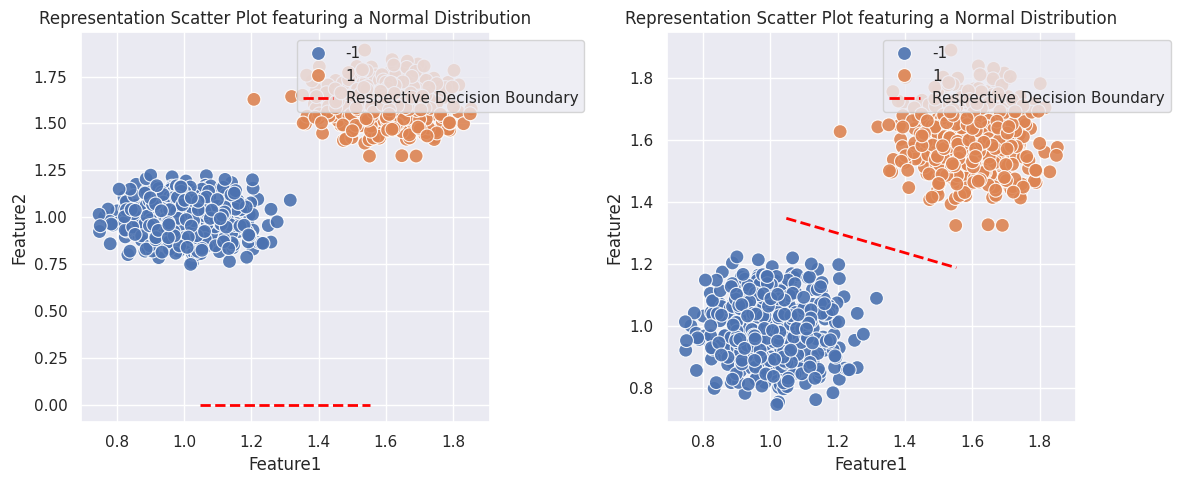

[0.8889921731367008, 0.8889921731367008, 0.7476571582814227, 0.6063624071135936, 0.46514461320295875, 0.3241043869232088] This are the gamma values
The algorithm runs for a specified number of epochs 15
Mistakes made during training: 33


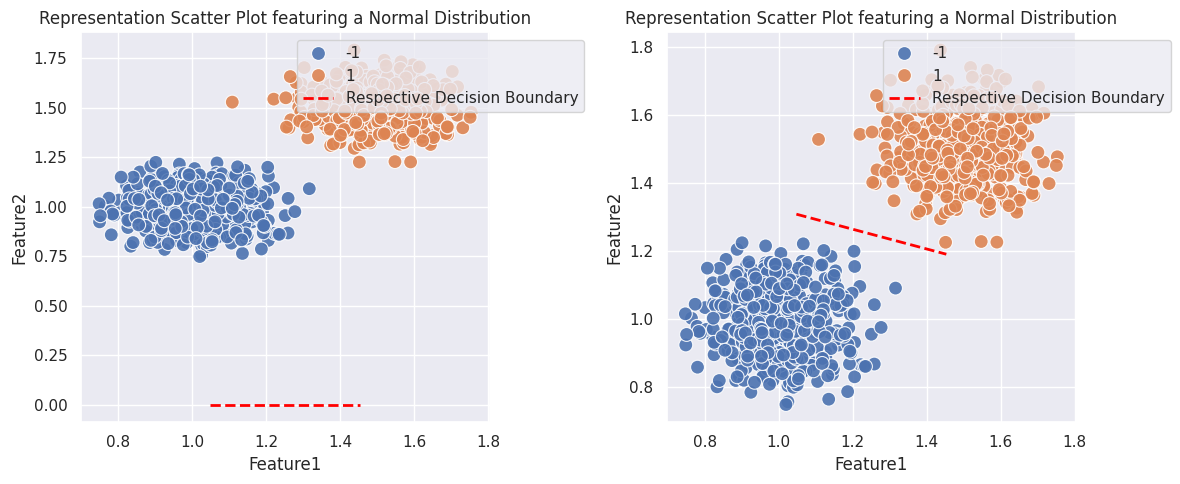

In [125]:
# List to store gamma values representing the distance between nearest points
gamma_values = []

# Find the closest points between clusters (g1 from cluster1 and g2 from cluster2)
g1, g2 = find_nearest_points(cluster1, cluster2)

# Calculate initial gamma and append to gamma_values
gamma = find_dist(g1, g2)
gamma_values.append(gamma)

# List to store the number of mistakes made by the perceptron for different gamma values
k_for_dataset = []

# Iteration over 5 gamma values
for i in range(5):
    # Initialize weight vector W
    W = np.zeros(X.shape[1])

    # Update gamma and append to gamma_values
    gamma = find_dist(g1, g2 - 0.1 * i)
    gamma_values.append(gamma)

    # Perturb the data to create a new dataset
    for i in range(2):
        for j in range(500):
            X[j + 500][i + 1] -= 0.1

    print(gamma_values, 'This are the gamma values')

    # Train the perceptron on the new dataset
    K, W = perceptron(X, Y, W, 1000)
    print("Mistakes made during training:", K)

    # Append the number of mistakes to k_for_dataset
    k_for_dataset.append(K)

    # Create DataFrame for visualization
    df = pd.DataFrame(X, columns=['Bias', 'Feature1', 'Feature2'])
    df['Label'] = Y

    # Plot the decision boundaries before and after training
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.set(style='whitegrid', palette='pastel')
    create_plot(ax[0], df, Y, np.zeros(X.shape[1]))
    create_plot(ax[1], df, Y, W)
    plt.tight_layout()
    plt.show()


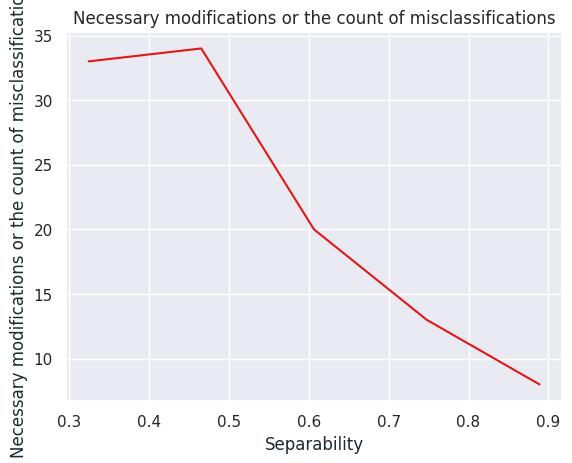

In [126]:
# Separability vs Changes required plot
plt.plot(gamma_values[1:],k_for_dataset,color='#E21717', label='K')
plt.title("Necessary modifications or the count of misclassifications")
plt.xlabel('Separability', color='#1C2833')
plt.ylabel('Necessary modifications or the count of misclassifications', color='#1C2833')
plt.show()

# **2. Gradient descent for training a linear classifier**

[10 = loss formulation 4 + gradient computation 3 + update equation 3]
Consider solving the above problem (training a line for classifying a linearly separable 2D dataset)
using Gradient Descent algorithm. Think of a loss function (beyond simple MSE) based on our

classroom discussion on the desirable properties of a loss function. You may implement the an-
alytical way of finding gradient for it. You may implement the basic version of gradient descent

update equation. Plot the dataset before and after training (with the classifier).

In [127]:
def sigmoid_activation(z):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-z))

# **loss formulation**

In [128]:
def binary_cross_entropy(features, labels, predictions):
    """Calculate binary cross-entropy loss."""
    epsilon = 1e-15
    predictions = np.clip(predictions, epsilon, 1 - epsilon)
    return -np.mean(labels * np.log(predictions) + (1 - labels) * np.log(1 - predictions))

# **gradient computation**

In [129]:
def calculate_gradient(features, labels, weights):
    """Calculate the gradient for gradient descent."""
    m = len(labels)
    z = np.dot(features, weights)
    predictions = sigmoid_activation(z)
    gradient = np.dot(features.T, (predictions - labels)) / m
    return gradient

# **Update Equations**


!!!!!!Running Gradient Descent Algorithm!!!!!!!!
New weights : w0/bias = -2.0047495525391144, w1 = 1.9952250380953673, w2 = 2.995257357642133
Loss at epoch 0 is 1.5201658839250887


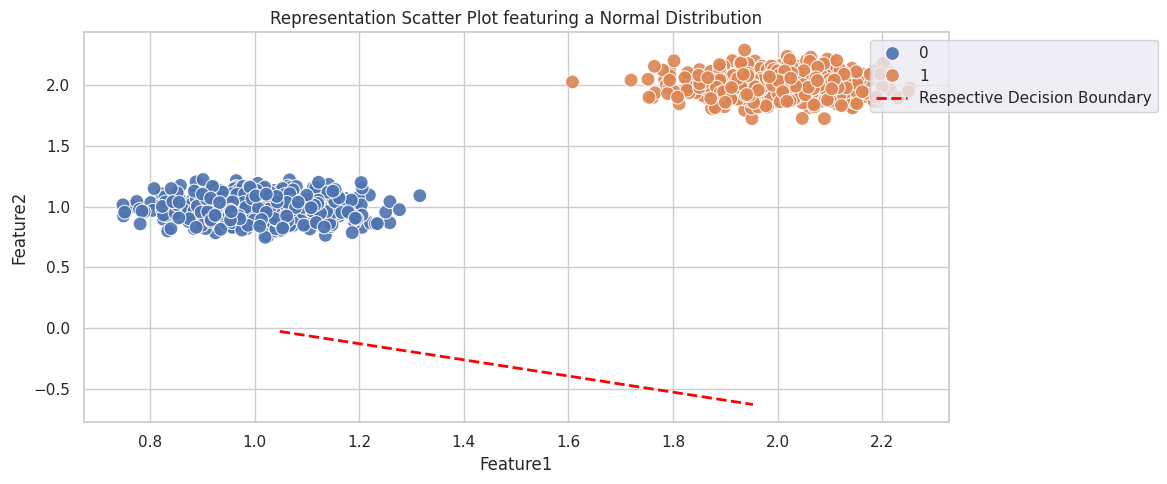


!!!!!!Running Gradient Descent Algorithm!!!!!!!!
New weights : w0/bias = -2.0378996614212697, w1 = 1.9618974763605888, w2 = 2.9621546382418766
Loss at epoch 7 is 1.4729626762226986


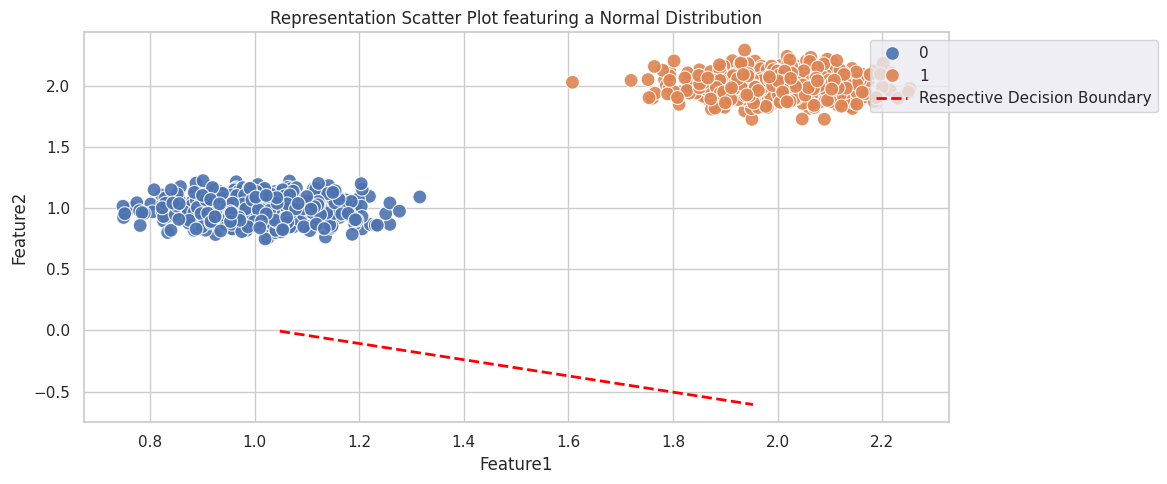


!!!!!!Running Gradient Descent Algorithm!!!!!!!!
New weights : w0/bias = -2.052052701229153, w1 = 1.9476686575642084, w2 = 2.948021402015705
Loss at epoch 10 is 1.4528867500788756


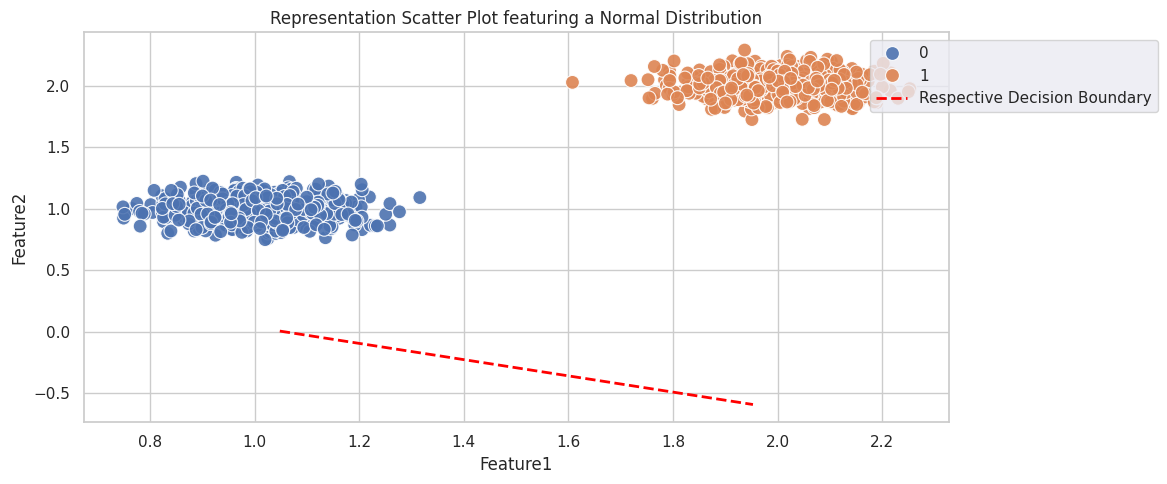


!!!!!!Running Gradient Descent Algorithm!!!!!!!!
New weights : w0/bias = -2.0755645448559377, w1 = 1.9240309822567947, w2 = 2.924541934502141
Loss at epoch 15 is 1.4196439205989269


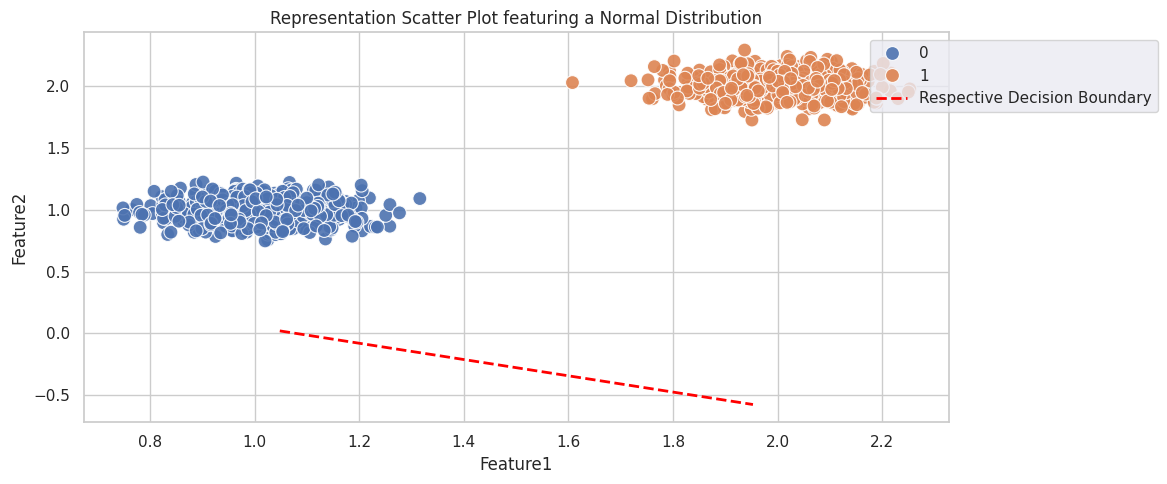


!!!!!!Running Gradient Descent Algorithm!!!!!!!!
New weights : w0/bias = -2.1083107850681126, w1 = 1.8911098091339915, w2 = 2.891839822484554
Loss at epoch 22 is 1.373585201325617


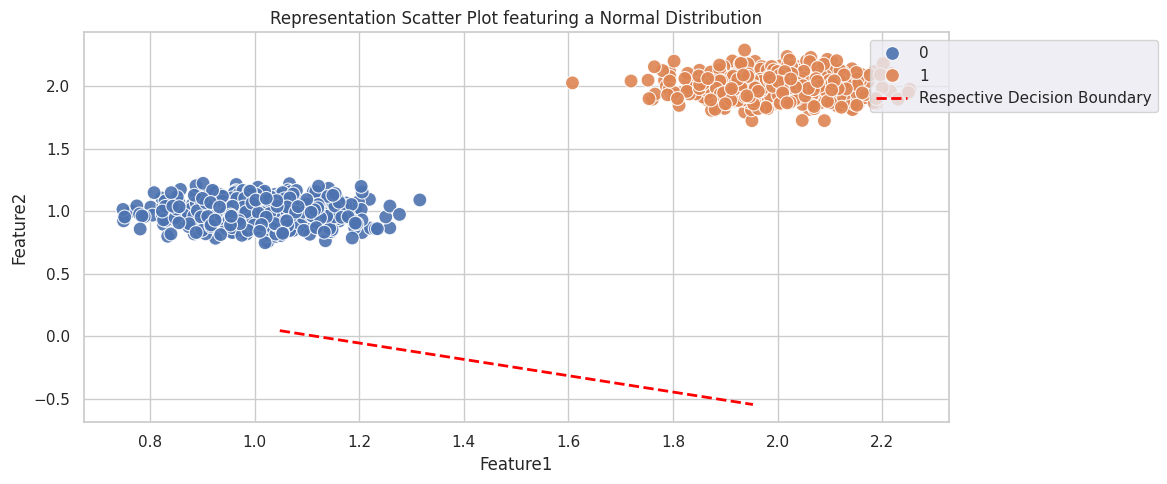


!!!!!!Running Gradient Descent Algorithm!!!!!!!!
New weights : w0/bias = -2.1593312703982677, w1 = 1.839818405535046, w2 = 2.8408864549509683
Loss at epoch 33 is 1.3024370431617307


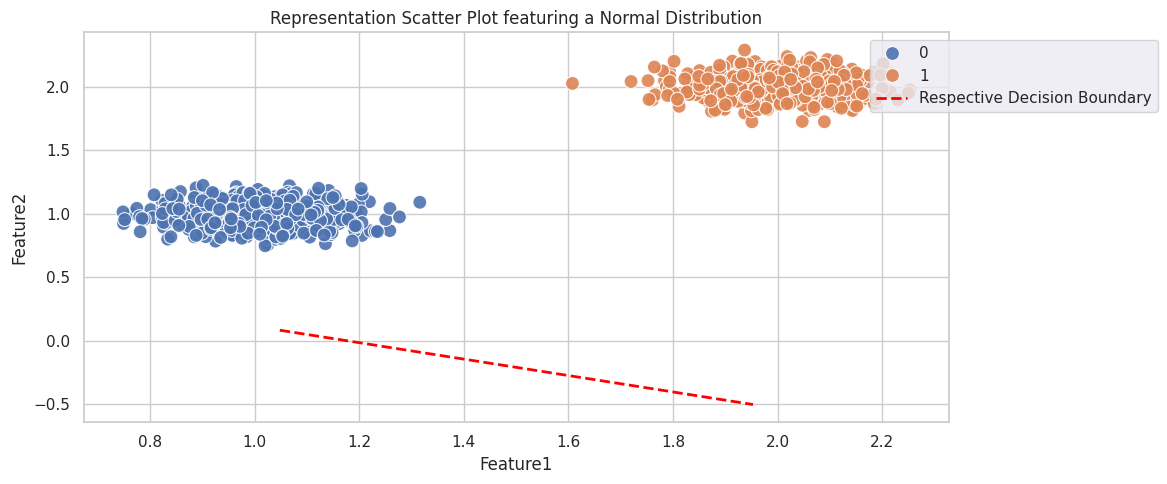


!!!!!!Running Gradient Descent Algorithm!!!!!!!!
New weights : w0/bias = -2.2324620397955734, w1 = 1.7663066443866202, w2 = 2.7678512557627872
Loss at epoch 49 is 1.2019543127567829


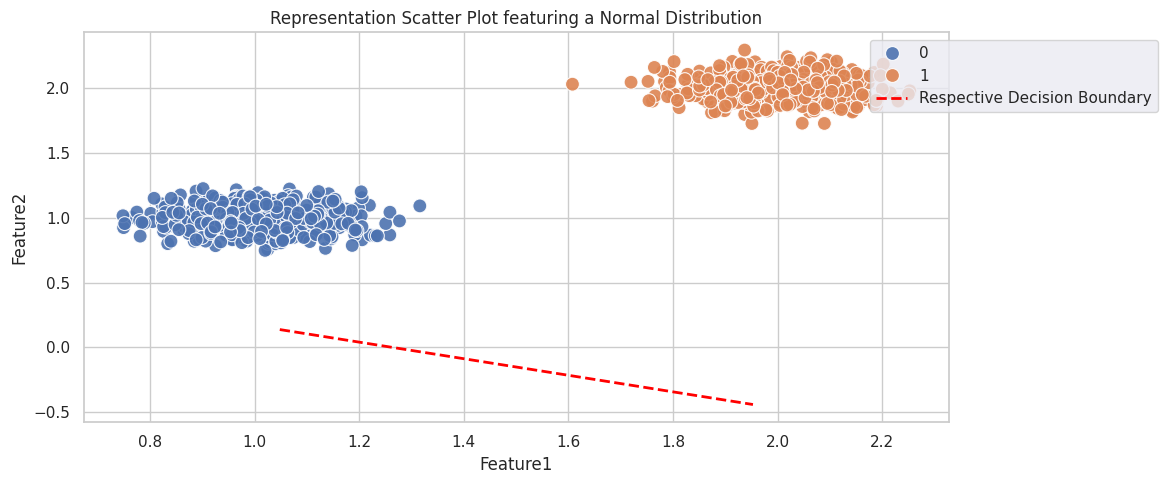


!!!!!!Running Gradient Descent Algorithm!!!!!!!!
New weights : w0/bias = -2.339303711610345, w1 = 1.6589429445599182, w2 = 2.6611633346440695
Loss at epoch 73 is 1.0590263895188476


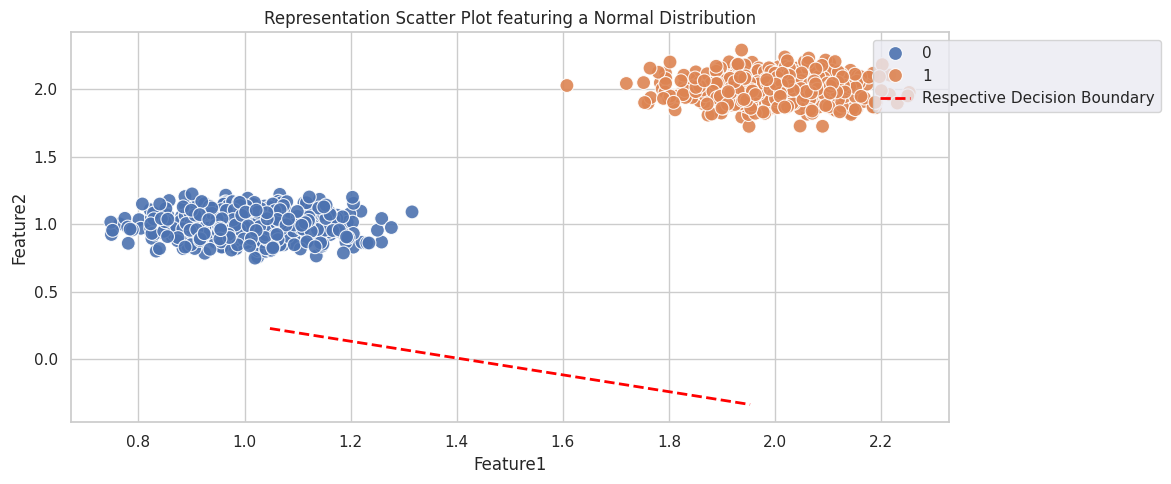


!!!!!!Running Gradient Descent Algorithm!!!!!!!!
New weights : w0/bias = -2.491525555606066, w1 = 1.5061561982332852, w2 = 2.5092850038791688
Loss at epoch 109 is 0.8658519008626321


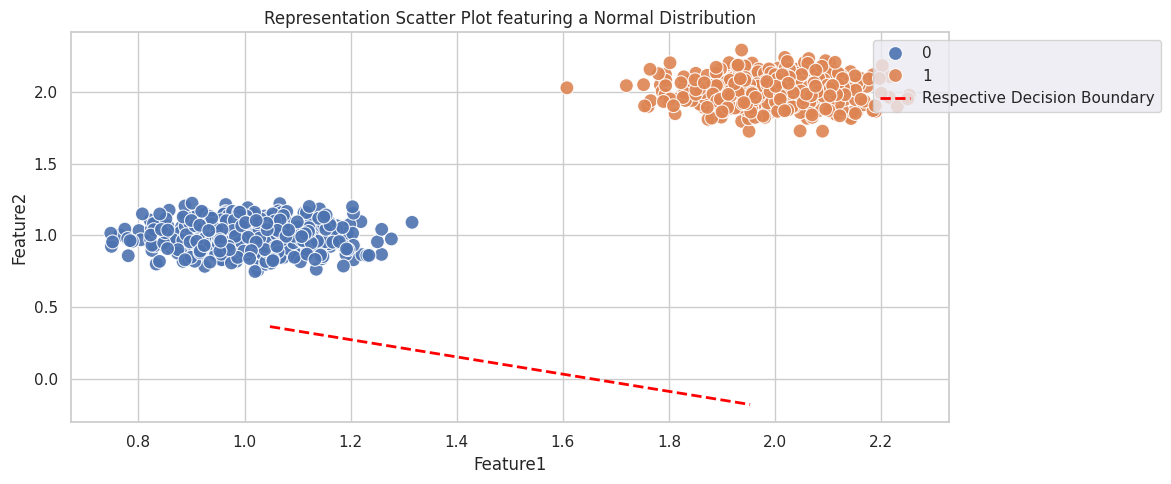


!!!!!!Running Gradient Descent Algorithm!!!!!!!!
New weights : w0/bias = -2.6966059051116047, w1 = 1.301341205138451, w2 = 2.305555580060405
Loss at epoch 163 is 0.6332809633541587


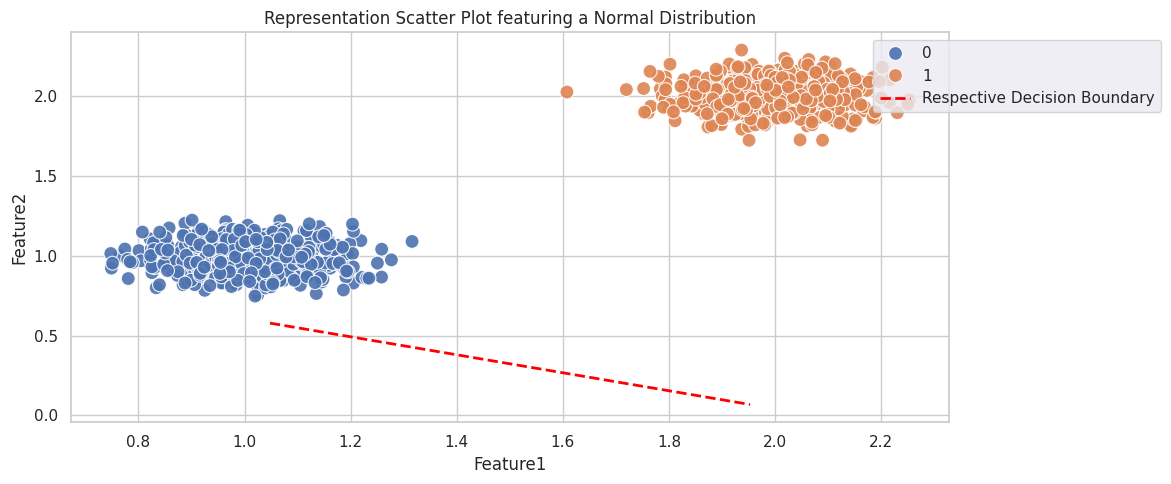


!!!!!!Running Gradient Descent Algorithm!!!!!!!!
New weights : w0/bias = -2.9418938223096283, w1 = 1.0624959926222348, w2 = 2.0677292915856897
Loss at epoch 244 is 0.41704754818519363


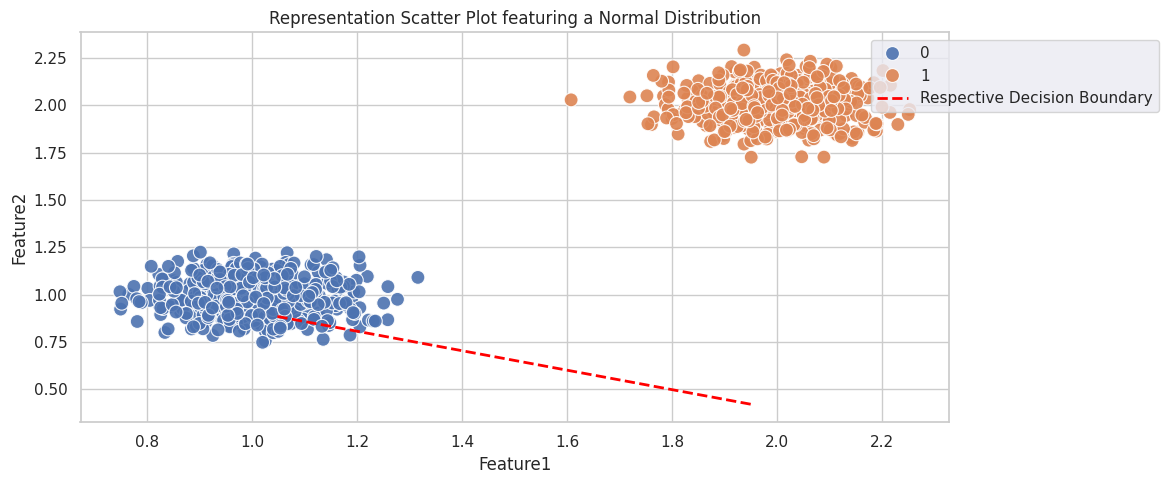


!!!!!!Running Gradient Descent Algorithm!!!!!!!!
New weights : w0/bias = -3.1817891543705286, w1 = 0.8589250513840117, w2 = 1.86481471291996
Loss at epoch 366 is 0.2973066453333237


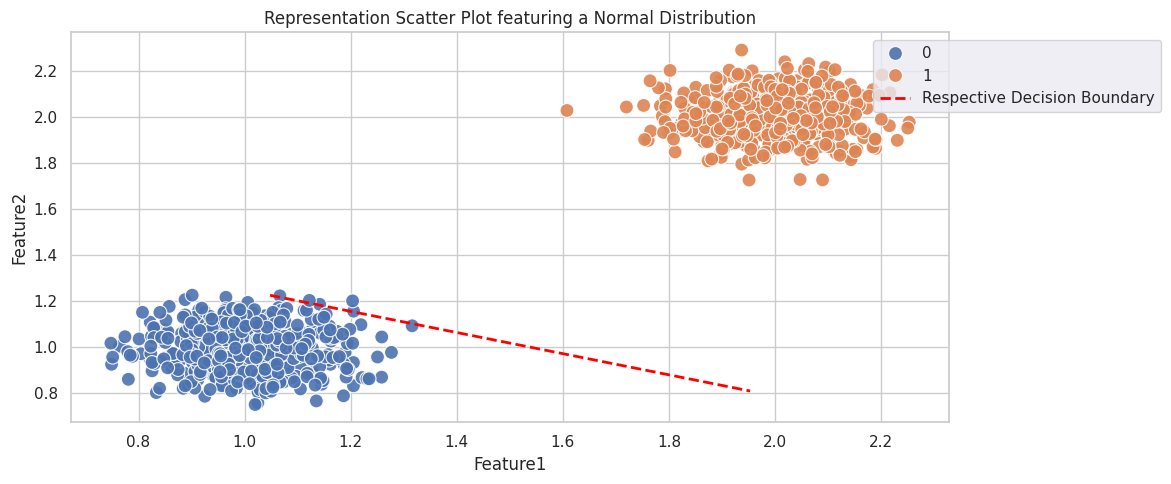


!!!!!!Running Gradient Descent Algorithm!!!!!!!!
New weights : w0/bias = -3.375459717571795, w1 = 0.777880449424502, w2 = 1.7840809797206205
Loss at epoch 549 is 0.26635330801955964


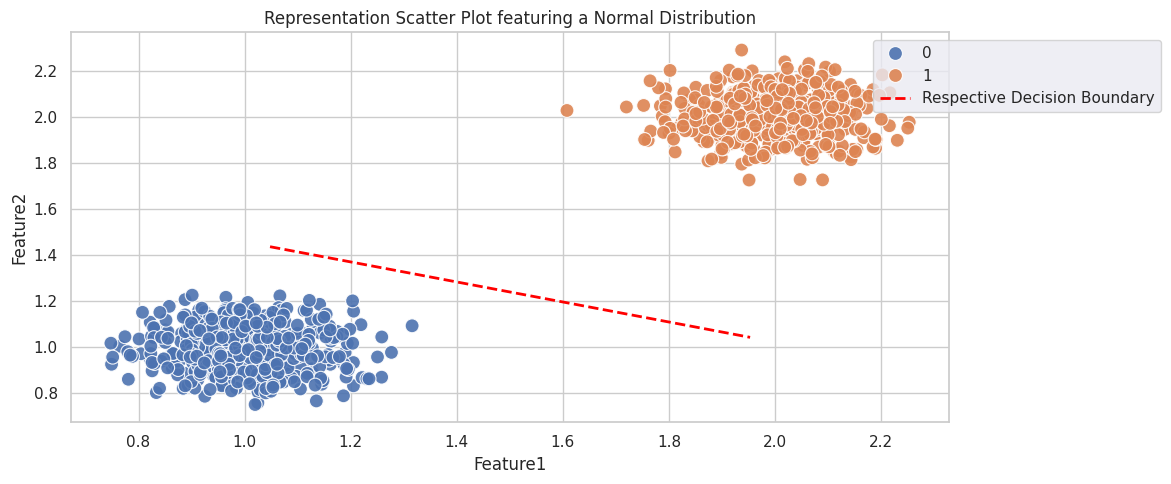


!!!!!!Running Gradient Descent Algorithm!!!!!!!!
New weights : w0/bias = -3.559318420662038, w1 = 0.8041164460984871, w2 = 1.8105095639042479
Loss at epoch 823 is 0.25320300373050875


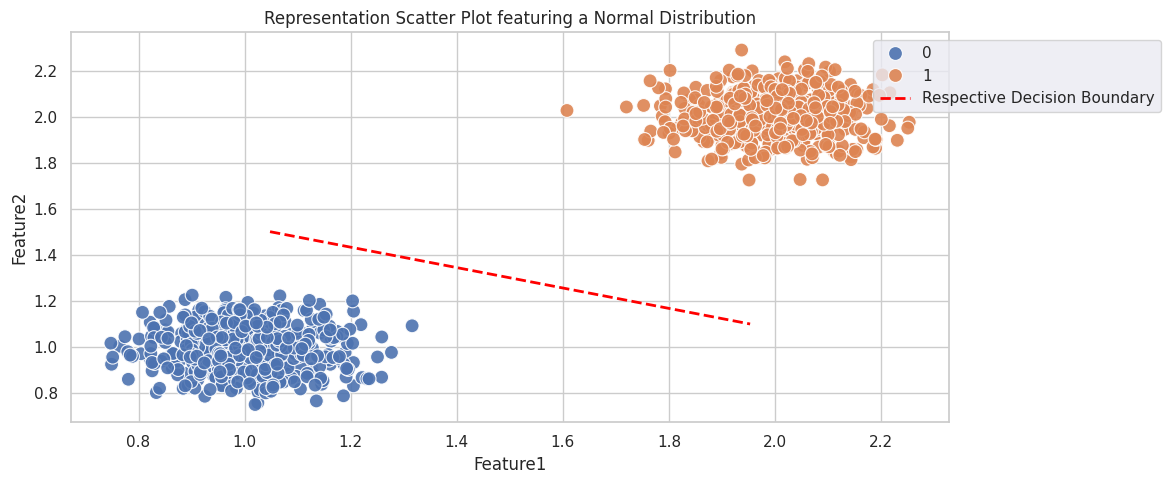


!!!!!!Running Gradient Descent Algorithm!!!!!!!!
New weights : w0/bias = -3.7974078696598434, w1 = 0.8783312020637352, w2 = 1.8849137746279054
Loss at epoch 1234 is 0.2367163872302752


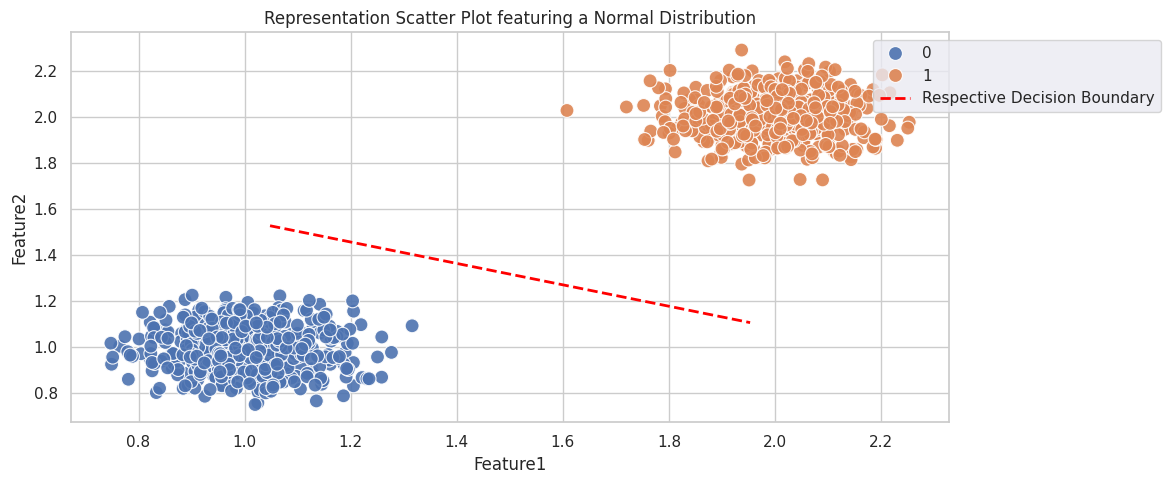


!!!!!!Running Gradient Descent Algorithm!!!!!!!!
New weights : w0/bias = -4.127328290055294, w1 = 0.9855096010310869, w2 = 1.992284335911685
Loss at epoch 1851 is 0.21533312779131525


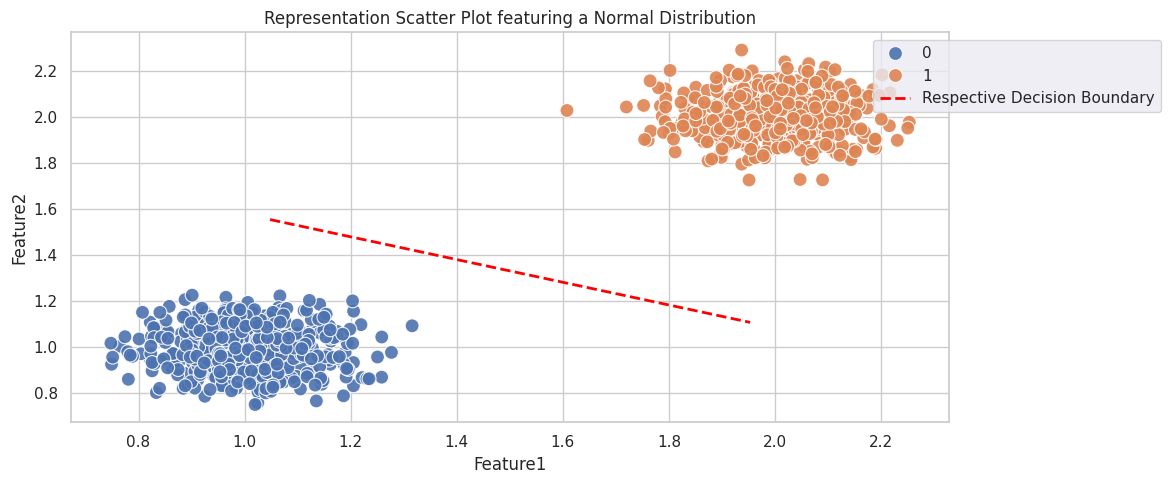


!!!!!!Running Gradient Descent Algorithm!!!!!!!!
New weights : w0/bias = -4.5735456329630635, w1 = 1.1310061573484746, w2 = 2.137944967693764
Loss at epoch 2776 is 0.1891964308436278


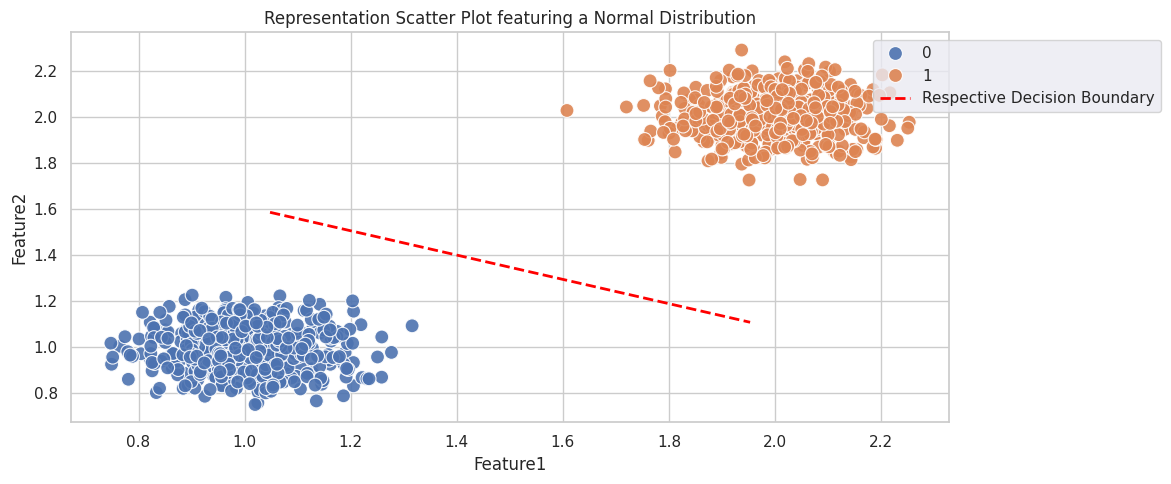


!!!!!!Running Gradient Descent Algorithm!!!!!!!!
New weights : w0/bias = -5.155740650289209, w1 = 1.321451929748506, w2 = 2.3285098082059994
Loss at epoch 4164 is 0.15948591569695555


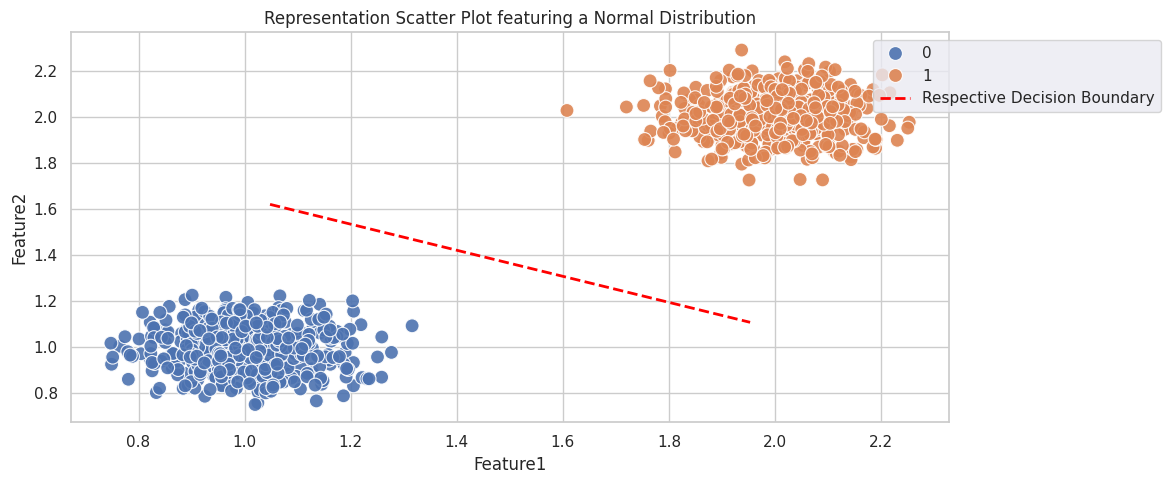


!!!!!!Running Gradient Descent Algorithm!!!!!!!!
New weights : w0/bias = -5.882949172620603, w1 = 1.560082653893034, w2 = 2.567276951711849
Loss at epoch 6246 is 0.12850600180655328


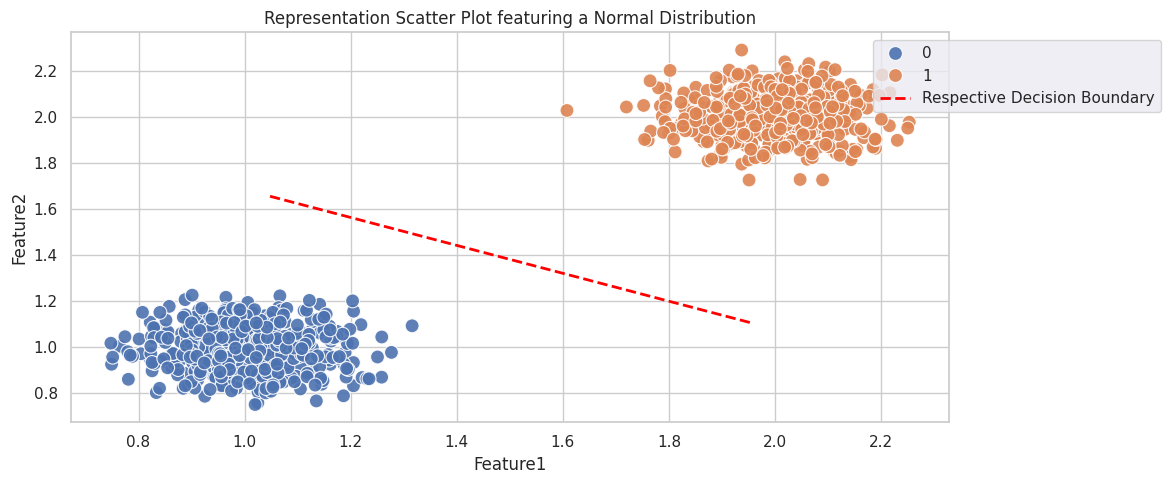


!!!!!!Running Gradient Descent Algorithm!!!!!!!!
New weights : w0/bias = -6.217639659465151, w1 = 1.6701212663775054, w2 = 2.6774194727984746
Loss at epoch 7359 is 0.11625475104071792


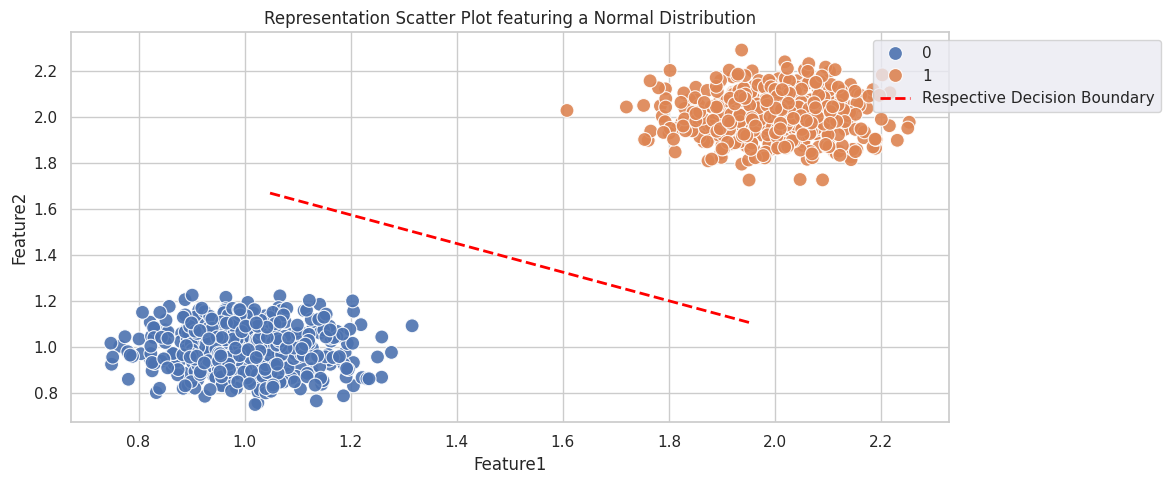

In [130]:


def perform_gradient_descent(features, labels, learning_rate=0.01, epochs=10000):
    """Perform gradient descent optimization."""
    m, n = features.shape
    weights = np.ones(n)
    weights[0] = -2
    weights[1] = 2
    weights[2] = 3

    losses = [1000]
    previous_loss = 1000
    a = 5
    breaking_flag = 0

    for epoch in range(epochs):
        gradient = calculate_gradient(features, labels, weights)
        weights -= learning_rate * gradient

        predictions = sigmoid_activation(np.dot(features, weights))
        loss = binary_cross_entropy(features, labels, predictions)
        losses.append(loss)

        if abs(previous_loss - loss) <= 0.00001:
            breaking_flag = 1
        else:
            previous_loss = loss

        if epoch % a != 0 and breaking_flag != 1 and epoch != 0:
            continue
        a = int(a * 1.5)

        print("\n!!!!!!Running Gradient Descent Algorithm!!!!!!!!")
        print(f"New weights : w0/bias = {weights[0]}, w1 = {weights[1]}, w2 = {weights[2]}")
        print(f"Loss at epoch {epoch} is {loss}")

        # Plot Graph
        sns.set(style='whitegrid', palette='pastel')
        fig, axes = plt.subplots(1, 1, figsize=(12, 5))

        df = pd.DataFrame(features, columns=['Bias','Feature1', 'Feature2'])
        df['Label'] = labels
        create_plot(axes, df, labels, weights)
        plt.tight_layout()
        plt.show()

        if breaking_flag == 1:
            return weights, losses

    return weights, losses

new_Y = np.array([0 for _ in range(500)] + [1 for _ in range(500)])
new_X = np.vstack([cluster1, cluster2])
new_X = np.column_stack([np.ones(new_X.shape[0]), new_X])
final_weights, losses = perform_gradient_descent(new_X, new_Y)


# **3. MLP with a single hidden layer**

[20 = dataset creation 5 + MLP definition 5 + backprop 10]
This question has two variations, and you are expected to attempt any one of the variations. The
second variation, if implemented properly, will fetch you a 5% bonus on this assignment.
Original Question: Consider a binary classification dataset that is not linearly separable in 2D
(e.g. data lying on the circumference two concentric circles). Train a Multi layer perceptron (MLP)
with a single hidden layer for classifying the same. You may use the loss function used in problem. You have to implement the backpropagation algorithm yourself.

# **DataSet Creation**

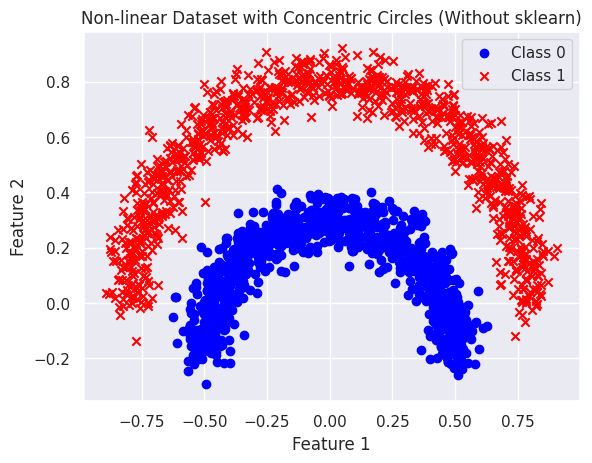

In [131]:
import numpy as np
import matplotlib.pyplot as plt

# Create a non-linear dataset
def create_dataset():
    x,y = create_nonlinear_dataset(num_samples=1000, factor=0.3, noise=0.05)
    return x, y.reshape(-1, 1)

def create_nonlinear_dataset(num_samples, factor, noise):
    """
    Create a non-linear dataset with points lying on the circumference of two concentric circles.

    Parameters:
    - num_samples: Number of samples in the dataset.
    - factor: Factor controlling the distance between circles.
    - noise: Factor controlling the amount of noise in the dataset.

    Returns:
    - X: Features of the dataset.
    - y: Labels of the dataset.
    """
    # Generate random angles for points on the circles
    angles = np.linspace(0,np.pi, num_samples)

    # Set radii for the circles
    radius_class_0 = 0.5
    radius_class_1 = 10.0

    # Generate coordinates for points on the circles
    x_class_0 = radius_class_0 * np.cos(angles) + np.random.normal(0, noise, num_samples)
    y_class_0 = radius_class_0 * np.sin(angles) + np.random.normal(0, noise, num_samples) -0.2
    x_class_1 = (radius_class_0 + factor) * np.cos(angles) + np.random.normal(0, noise, num_samples)
    y_class_1 = (radius_class_0 + factor) * np.sin(angles) + np.random.normal(0, noise, num_samples)

    # Combine the coordinates and labels
    class_0 = np.column_stack((x_class_0, y_class_0))
    class_1 = np.column_stack((x_class_1, y_class_1))

    # Combine the two classes
    x = np.vstack((class_0, class_1))
    y = np.vstack((np.zeros((num_samples, 1)), np.ones((num_samples, 1))))

    return x, y

# Create a non-linear dataset
X, y = create_dataset()

# Visualize the dataset
plt.scatter(X[y.flatten() == 0][:, 0], X[y.flatten() == 0][:, 1], label='Class 0', marker='o', c='blue')
plt.scatter(X[y.flatten() == 1][:, 0], X[y.flatten() == 1][:, 1], label='Class 1', marker='x', c='red')
plt.title('Non-linear Dataset with Concentric Circles')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()



# **MLP Definition**



Using a forward and backward pass, this code creates a basic Multi-Layer Perceptron (MLP) for binary classification. After setting up the MLP with random weights and biases, it runs a training loop iteratively for a predetermined number of epochs. It carries out a forward pass to generate predictions, a backward pass to update weights and biases via gradient descent, and a binary cross-entropy calculation to determine the loss for each epoch. Every 1000 epochs, the training loss is reported, and a plot of the overall loss over those epochs is produced. It also uses a scatter plot to show the trained model's decision boundaries. For matrix operations, the code makes use of NumPy and the sigmoid activation function.



# **Forward Propagation and Backward Propagation**

Epoch 0, Loss: 0.8331146282788146
Epoch 1000, Loss: 0.021265820139412188
Epoch 2000, Loss: 0.013649088371407596
Epoch 3000, Loss: 0.010686916647809287
Epoch 4000, Loss: 0.009046461961074344
Epoch 5000, Loss: 0.00799416676249958
Epoch 6000, Loss: 0.0072682777309431065
Epoch 7000, Loss: 0.006745143544436843
Epoch 8000, Loss: 0.0063490394669935895
Epoch 9000, Loss: 0.006024866977614442


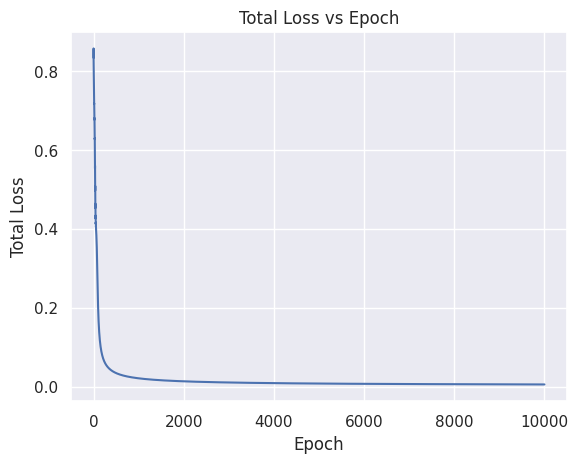

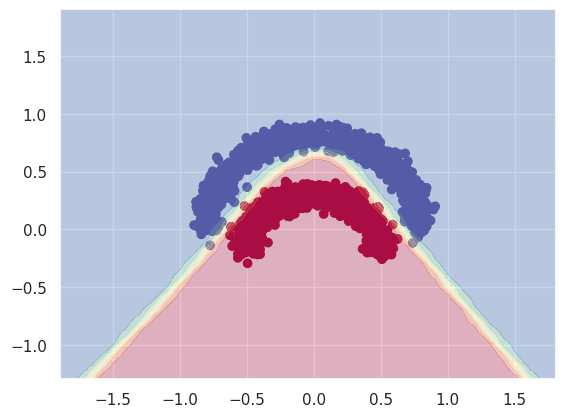

In [132]:
import numpy as np
import matplotlib.pyplot as plt

# Forward pass function
def forward_pass(weights_input_hidden, biases_hidden, weights_hidden_output, biases_output, X):

    # Calculating hidden layer input
    hidden_input = np.dot(X, weights_input_hidden) + biases_hidden

    # Applying sigmoid activation to hidden layer input
    hidden_output = sigmoid(hidden_input)

    # Calculate final layer input
    output_input = np.dot(hidden_output, weights_hidden_output) + biases_output

    # Apply sigmoid activation to obtain predictions
    predictions = sigmoid(output_input)

    return predictions

# Backward pass function
def backward_pass(weights_input_hidden, biases_hidden, weights_hidden_output, biases_output, X, y, learning_rate):

    # weights connecting input to hidden layer (weights_input_hidden), and adding biases (biases_hidden)
    hidden_input = np.dot(X, weights_input_hidden) + biases_hidden

    # Apply the sigmoid activation function to the hidden layer input
    hidden_output = sigmoid(hidden_input)

    # Calculate the input to the output layer by taking the dot product of hidden layer output,
    # weights connecting hidden to output layer (weights_hidden_output), and adding biases (biases_output)
    output_input = np.dot(hidden_output, weights_hidden_output) + biases_output

    # Apply the sigmoid activation function to obtain the final predictions
    predictions = sigmoid(output_input)

    # Calculate the error between predictions and actual labels
    error = y - predictions

    # Calculate the gradient of the output layer with respect to the error
    output_delta = error * (predictions * (1 - predictions))

    # Calculate the hidden layer error using the output layer gradient
    hidden_error = output_delta.dot(weights_hidden_output.T)

    # Calculate the gradient of the hidden layer with respect to the hidden layer error
    hidden_delta = hidden_error * (hidden_output * (1 - hidden_output))

    # Update weights and biases based on gradients and learning rate
    weights_hidden_output_update = learning_rate * np.dot(hidden_output.T, output_delta)

    # Calculate the updates for the biases of the output layer
    biases_output_update = learning_rate * np.sum(output_delta, axis=0, keepdims=True)

    # Calculate the updates for the weights connecting the input layer to the hidden layer
    weights_input_hidden_update = learning_rate * np.dot(X.T, hidden_delta)

    # Calculate the updates for the biases of the hidden layer
    biases_hidden_update = learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)

    # Apply the updates to weights and biases
    weights_hidden_output += weights_hidden_output_update
    biases_output += biases_output_update
    weights_input_hidden += weights_input_hidden_update
    biases_hidden += biases_hidden_update

    return weights_input_hidden, biases_hidden, weights_hidden_output, biases_output

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Initialize MLP
input_size = 2  # 2 features (x, y)
hidden_size = 5  # Choosing an appropriate size
output_size = 1  # Binary classification

# Initialize weights and biases with random values
weights_input_hidden = np.random.rand(input_size, hidden_size)
biases_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.rand(hidden_size, output_size)
biases_output = np.zeros((1, output_size))

# Training the loop
epochs = 10000
learning_rate = 0.01

# List to store the loss at each epoch
losses = []

for epoch in range(epochs):
    # Forward pass
    predictions = forward_pass(weights_input_hidden, biases_hidden, weights_hidden_output, biases_output, X)

    # Backward pass
    weights_input_hidden, biases_hidden, weights_hidden_output, biases_output = backward_pass(weights_input_hidden, biases_hidden, weights_hidden_output, biases_output, X, y.reshape(-1, 1), learning_rate)

    # Calculate and store the loss
    loss = np.mean(-y * np.log(predictions) - (1 - y) * np.log(1 - predictions))
    losses.append(loss)

    # Print the loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

# Plot the total loss at every epoch
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.title('Total Loss vs Epoch')
plt.show()

# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = forward_pass(weights_input_hidden, biases_hidden, weights_hidden_output, biases_output, np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Spectral)
plt.show()
